In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,Embedding, Flatten, Bidirectional, SimpleRNN, LSTM, GRU

import warnings
warnings.filterwarnings("ignore")

In [ ]:
food_rev=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL-NLP/food_review.csv")

In [ ]:
food_rev.head()

,Unnamed: 0,Text,Score
0,0,I bought these from a large chain pet store. a...,1
1,1,"This soup is incredibly good! But honestly, I...",5
2,2,Our family loves these tasty and healthy sesam...,5
3,3,The local auto shop offers this free to it cus...,4
4,4,I brought 2 bottles. One I carry in my pocket...,5


In [ ]:
food_rev.shape

(40500, 3)

In [ ]:
food_rev.Score.max()

5

In [ ]:
food_rev.Score.min()

1

In [ ]:
food_rev['Score'].value_counts(sort=False)

1    8079
2    8095
3    8103
4    8117
5    8106
Name: Score, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(food_rev['Score'])
food_rev['Score']=le.transform(food_rev['Score'])

In [ ]:
food_rev['Score'].value_counts(sort=False)

0    8079
1    8095
2    8103
3    8117
4    8106
Name: Score, dtype: int64

In [ ]:
from wordcloud import WordCloud

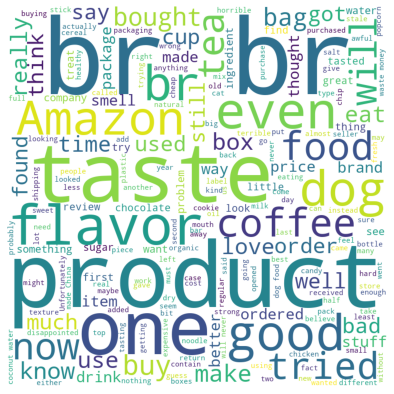

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)
wc.generate(''.join(food_rev[food_rev["Score"]==0]["Text"]))
plt.figure(figsize = (7,7)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

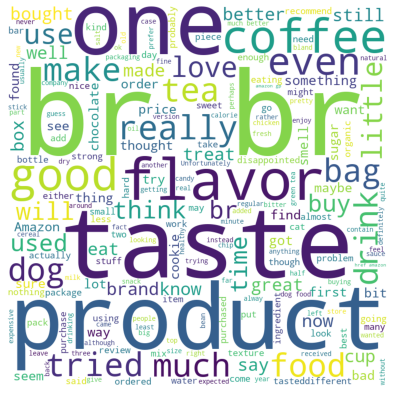

In [ ]:
wc1 = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)
wc1.generate(''.join(food_rev[food_rev["Score"]==1]["Text"]))
plt.figure(figsize = (7,7)) 
plt.imshow(wc1) 
plt.axis("off") 
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
food_rev['Text'].head()

0    I bought these from a large chain pet store. a...
1    This soup is incredibly good!  But honestly, I...
2    Our family loves these tasty and healthy sesam...
3    The local auto shop offers this free to it cus...
4    I brought 2 bottles.  One I carry in my pocket...
Name: Text, dtype: object

In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
stop=stopwords.words('english')

In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
html_tag_words=['br']

In [ ]:
stop_words=stop+html_tag_words

In [ ]:
def decontract(Text):
    Text = re.sub(r"won\'t", "will not", Text)
    Text = re.sub(r"can\'t", "can not", Text)
    Text = re.sub(r"didn\'t", "did not", Text)
    Text = re.sub(r"n\'t", " not", Text)
    Text = re.sub(r"\'re", " are", Text)
    Text = re.sub(r"\'s", " is", Text)
    Text = re.sub(r"\'d", " would", Text)
    Text = re.sub(r"\'ll", " will", Text)
    Text = re.sub(r"\'t", " not", Text)
    Text = re.sub(r"\'ve", " have", Text)
    Text = re.sub(r"\'m", " am", Text)
    return Text

In [ ]:
def clean(review):
    review = re.sub(r"http\S+", "", review)             # removing website links
    review = BeautifulSoup(review, 'lxml').get_text()   # removing html tags
    review = decontract(review)                         # decontracting
    review = re.sub("\S*\d\S*", "", review).strip()     # removing the words with numeric digits
    review = re.sub('[^A-Za-z]+', ' ', review)          # removing non-word characters
    review = review.lower()                             # converting to lower case
    review = [word for word in review.split(" ") if not word in stop_words] # removing stop words
    review = [lemmatizer.lemmatize(token, "v") for token in review] #Lemmatization
    review = " ".join(review)
    review.strip()
    return review

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
food_rev['Text'] = food_rev['Text'].apply(clean)

In [ ]:
food_rev['Text'].head(10)

0    buy large chain pet store read review check ba...
1    soup incredibly good honestly look better deal...
2    family love tasty healthy sesame honey almonds...
3    local auto shop offer free customers try twice...
4    bring bottle one carry pocket home fell love v...
5    recommend product relative mine must say feel ...
6                           blunt would call orangina 
7    stuff suck let explain clump nice easy keep li...
8    add slice saute veggies onions make delcious a...
9    pamela make awesome delicious easy use wheatfr...
Name: Text, dtype: object

In [ ]:
x = food_rev["Text"]
y = food_rev["Score"]

In [ ]:
x.head(10)

0    buy large chain pet store read review check ba...
1    soup incredibly good honestly look better deal...
2    family love tasty healthy sesame honey almonds...
3    local auto shop offer free customers try twice...
4    bring bottle one carry pocket home fell love v...
5    recommend product relative mine must say feel ...
6                           blunt would call orangina 
7    stuff suck let explain clump nice easy keep li...
8    add slice saute veggies onions make delcious a...
9    pamela make awesome delicious easy use wheatfr...
Name: Text, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)

In [ ]:
doc_length = []
for doc in train_sequences:
  doc_length.append(len(doc))
max(doc_length)

925

In [ ]:
np.quantile(doc_length,0.95)

111.0

In [ ]:
max_length = 111

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length)
print(train_padded)

[[   0    0    0 ...  634 1037   60]
 [   0    0    0 ...   96  515  837]
 [   0    0    0 ... 1091  457  258]
 ...
 [   0    0    0 ...   27 1498  938]
 [   0    0    0 ...   74  795  178]
 [   0    0    0 ...  107 1879  180]]


In [ ]:
vocab_len = len(tokenizer.index_word)+1

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(vocab_len, 500, input_length=max_length, mask_zero=True))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(5,activation="softmax"))  

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 111, 50)           1390600   
_________________________________________________________________
flatten (Flatten)            (None, 5550)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 44408     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 45        
Total params: 1,435,197
Trainable params: 1,435,197
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [ ]:
model.fit(train_padded,y_train,epochs=30,batch_size=128)

Epoch 1/30
254/254 [==============================] - 6s 22ms/step - loss: 1.5668
Epoch 2/30
254/254 [==============================] - 6s 23ms/step - loss: 1.2819
Epoch 3/30
254/254 [==============================] - 6s 23ms/step - loss: 1.0333
Epoch 4/30
254/254 [==============================] - 6s 22ms/step - loss: 0.7286
Epoch 5/30
254/254 [==============================] - 6s 22ms/step - loss: 0.4796
Epoch 6/30
254/254 [==============================] - 6s 22ms/step - loss: 0.3244
Epoch 7/30
254/254 [==============================] - 6s 22ms/step - loss: 0.2283
Epoch 8/30
254/254 [==============================] - 6s 22ms/step - loss: 0.1579
Epoch 9/30
254/254 [==============================] - 6s 22ms/step - loss: 0.1124
Epoch 10/30
254/254 [==============================] - 6s 22ms/step - loss: 0.0817
Epoch 11/30
254/254 [==============================] - 6s 25ms/step - loss: 0.0614
Epoch 12/30
254/254 [==============================] - 6s 25ms/step - loss: 0.0479
Epoch 13/30
2

In [ ]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

In [ ]:
y_pred=model.predict(test_padded)

In [ ]:
y_pred=y_pred.argmax(axis=1)

In [ ]:
y_pred

array([1, 0, 3, ..., 4, 1, 3])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.41      0.53      1613
           1       0.41      0.54      0.46      1575
           2       0.39      0.54      0.45      1683
           3       0.41      0.48      0.44      1609
           4       0.69      0.39      0.50      1620

    accuracy                           0.47      8100
   macro avg       0.53      0.47      0.48      8100
weighted avg       0.53      0.47      0.48      8100



**Simple RNN layer**

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_len,500, input_length=max_length, mask_zero=True))
model2.add(SimpleRNN(32, activation="tanh", return_sequences=True))
model2.add(SimpleRNN(16, activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(5,activation="softmax"))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 111, 50)           1390600   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 111, 32)           2656      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 45        
Total params: 1,394,293
Trainable params: 1,394,293
Non-trainable params: 0
____________________________________________

In [ ]:
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [ ]:
model2.fit(train_padded,y_train,epochs=30,batch_size=128)

Epoch 1/30
254/254 [==============================] - 29s 108ms/step - loss: 1.5235
Epoch 2/30
254/254 [==============================] - 28s 110ms/step - loss: 1.1754
Epoch 3/30
254/254 [==============================] - 29s 113ms/step - loss: 0.9074
Epoch 4/30
254/254 [==============================] - 29s 116ms/step - loss: 0.6429
Epoch 5/30
254/254 [==============================] - 28s 108ms/step - loss: 0.4364
Epoch 6/30
254/254 [==============================] - 28s 109ms/step - loss: 0.2932
Epoch 7/30
254/254 [==============================] - 27s 106ms/step - loss: 0.2031
Epoch 8/30
254/254 [==============================] - 27s 107ms/step - loss: 0.1386
Epoch 9/30
254/254 [==============================] - 27s 107ms/step - loss: 0.1056
Epoch 10/30
254/254 [==============================] - 27s 108ms/step - loss: 0.0837
Epoch 11/30
254/254 [==============================] - 27s 108ms/step - loss: 0.0709
Epoch 12/30
254/254 [==============================] - 27s 108ms/step - lo

In [ ]:
y_pred=model2.predict(test_padded)
y_pred=y_pred.argmax(axis=1)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1613
           1       0.42      0.49      0.45      1575
           2       0.47      0.38      0.42      1683
           3       0.40      0.46      0.43      1609
           4       0.58      0.51      0.54      1620

    accuracy                           0.47      8100
   macro avg       0.47      0.47      0.47      8100
weighted avg       0.47      0.47      0.47      8100



**Bi-Directional RNN**

In [ ]:
model3 = Sequential()
model3.add(Embedding(vocab_len,500, input_length=max_length, mask_zero=True))
model3.add(Bidirectional(SimpleRNN(32, activation="tanh", return_sequences=True)))
model3.add(Bidirectional(SimpleRNN(16, activation="relu")))
model3.add(Dense(8, activation="relu"))
model3.add(Dense(8, activation="relu"))
model3.add(Dense(5,activation="softmax"))

In [ ]:
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [ ]:
model3.fit(train_padded,y_train,epochs=30,batch_size=128)

Epoch 1/30
254/254 [==============================] - 130s 498ms/step - loss: 1.5353
Epoch 2/30
254/254 [==============================] - 126s 495ms/step - loss: 1.2580
Epoch 3/30
254/254 [==============================] - 125s 492ms/step - loss: 0.7831
Epoch 4/30
254/254 [==============================] - 122s 482ms/step - loss: 0.3596
Epoch 5/30
254/254 [==============================] - 125s 493ms/step - loss: 0.1536
Epoch 6/30
254/254 [==============================] - 126s 496ms/step - loss: 0.0673
Epoch 7/30
254/254 [==============================] - 126s 495ms/step - loss: 0.0346
Epoch 8/30
254/254 [==============================] - 123s 482ms/step - loss: 0.0218
Epoch 9/30
254/254 [==============================] - 123s 486ms/step - loss: 0.0162
Epoch 10/30
254/254 [==============================] - 124s 486ms/step - loss: 0.0416
Epoch 11/30
254/254 [==============================] - 123s 485ms/step - loss: 0.1719
Epoch 12/30
254/254 [==============================] - 125s 491

In [ ]:
y_pred=model3.predict(test_padded)
y_pred=y_pred.argmax(axis=1)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1613
           1       0.40      0.44      0.42      1575
           2       0.43      0.40      0.41      1683
           3       0.41      0.42      0.42      1609
           4       0.61      0.57      0.59      1620

    accuracy                           0.48      8100
   macro avg       0.48      0.48      0.48      8100
weighted avg       0.48      0.48      0.48      8100

